=======================================Softmax Regression========================================

##### Classification Setup

- Move from regression (“how much?”) to classification (“which class?”).  
- Labels are represented by **one-hot vectors**.  
- Use a linear model to produce a **logit vector**: $\mathbf{O} = W \mathbf{x} + b$

##### Softmax Function
- Turn logits into probabilities: $\hat{y}_i = \frac{\exp(o_i)}{\sum_j \exp(o_j)}$
- The predicted class is the index of the highest logit: $\arg\max_j \hat y_j = \arg\max_j o_j$

##### Vectorized Minibatch

- For a batch $X \in \mathbb{R}^{n \times d}$, weights $W \in \mathbb{R}^{d \times q}$, bias $b \in \mathbb{R}^{1 \times q}$: $O = X W + b, \hat Y = \text{softmax}(O)$
- Softmax is applied row-wise to produce probability distributions per example.

##### Loss: Cross-Entropy

- Use **maximum likelihood** or **negative log-likelihood**: $-\log P(\mathbf{Y} \mid \mathbf{X}) = \sum_i -\log P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)})$
- Loss for one example with one-hot label $\mathbf{y}$: $\ell(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^q y_j \log \hat{y}_j$
- Equivalent form using logits: $\ell(\mathbf{y}, \hat{\mathbf{y}}) = \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j\,o_j$

Proof: giving $\hat{y}_j = \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)}$

Cross-entropy loss: $\ell(y, \hat{y}) = -\sum_{j=1}^q y_j \log \hat{y}_j$

Substitute softmax: $\ell = -\sum_{j=1}^q y_j \log\left(\frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)}\right) = -\sum_{j=1}^q y_j \left[o_j - \log \sum_{k=1}^q \exp(o_k)\right] = -\sum_{j=1}^q y_j o_j \;+\;\sum_{j=1}^q y_j \log \sum_{k=1}^q \exp(o_k)$

Since $y$ is one-hot, $\sum_{j=1}^q y_j = 1$, so: $\ell = \log \sum_{k=1}^q \exp(o_k)\;-\;\sum_{j=1}^q y_j o_j$


##### Gradient (Derivative)

- Derivative of the loss w.r.t. logit $o_j$: $\frac{\partial \ell}{\partial o_j} = \text{softmax}(o_j) - y_j$
- Interpretation: difference between predicted probability and true label (one-hot).

##### Information Theory Interpretation

- **Entropy** of a distribution $P$: $H[P] = -\sum_j P(j) \log P(j)$
- **Surprisal** of event $j$: $-\log P(j)$.  
- **Cross-entropy** from true distribution $P$ to model $Q$: $H(P, Q) = -\sum_j P(j) \log Q(j)$  
- Minimizing cross-entropy ≡ (i) maximizing likelihood; (ii) minimizing expected surprisal.

##### Practical Considerations & Discussion

- The combination of softmax + cross-entropy is a foundational probabilistic model for classification.  
- Fully connected layers between input size $d$ and $q$ classes cost $O(dq)$ to compute.  
- For large $d$ or $q$, one might use approximations or compression (e.g., matrix factorization, sparse methods) to reduce computational burden.

=================================================The Image Classification Dataset==================================================

In [1]:
%matplotlib inline
import time
from d2l import torch as d2l
import torch
import torchvision
from torchvision import transforms

d2l.use_svg_display()

In [2]:
class FashionMNIST(d2l.DataModule):  #@save
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize), transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(root=self.root, train=False, transform=trans, download=True)

data = FashionMNIST(resize=(32, 32))
len(data.train), len(data.val), data.train[0][0].shape #c*h*w

(60000, 10000, torch.Size([1, 32, 32]))

In [3]:
@d2l.add_to_class(FashionMNIST)  #@save
def text_labels(self, indices):
    """Return text labels."""
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

In [4]:
@d2l.add_to_class(FashionMNIST)  #@save
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train, num_workers=self.num_workers)

In [5]:
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

/workspaces/pytorch-basics/.venv310/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


In [6]:
tic = time.time()
for X, y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

'7.35 sec'

In [7]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """Plot a list of images."""
    raise NotImplementedError

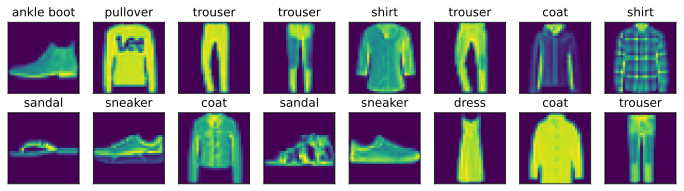

In [8]:
@d2l.add_to_class(FashionMNIST)  #@save
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels: labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)
batch = next(iter(data.val_dataloader()))
data.visualize(batch, nrows=2, ncols=8)

In [9]:
X, y = batch
X.shape, X.squeeze(1).shape, y.shape

(torch.Size([64, 1, 32, 32]), torch.Size([64, 32, 32]), torch.Size([64]))

==============================================The Base Classification Model=============================================

In [10]:
class Classifier(d2l.Module):  #@save
    """The base class of classification models."""
    def validation_step(self, batch):
        Y_hat = self(*batch[:-1])  # batch = (X, y), so batch[:-1] = (X,) 
        self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

In [11]:
# explain * on tuples
batch = (X, )  # Single element tuple
# result = self(*batch) // Equivalent to: self(X) - unpacks and passes X as argument


batch = (X, y)  # Two element tuple
# result = self(*batch) // Equivalent to: self(X, y) - unpacks and passes X and y as separate arguments

In [12]:
@d2l.add_to_class(d2l.Module)  #@save
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), lr=self.lr)

In [13]:
@d2l.add_to_class(Classifier)  #@save
def accuracy(self, Y_hat, Y, averaged=True):
    """Compute the number of correct predictions."""
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    preds = Y_hat.argmax(axis=1).type(Y.dtype)
    compare = (preds == Y.reshape(-1)).type(torch.float32)
    return compare.mean() if averaged else compare

================================Softmax Regression Implementation from Scratch=========================

In [14]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [15]:
def softmax(X): # each row is an example
    """Softmax function."""
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition  # The broadcasting mechanism is applied here

In [16]:
X = torch.rand((2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.1842, 0.1928, 0.1952, 0.1719, 0.2559],
         [0.1643, 0.2494, 0.1710, 0.1948, 0.2205]]),
 tensor([1.0000, 1.0000]))

In [17]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

In [ ]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    X = X.reshape((-1, self.W.shape[0]))
    # torch.matmul(X, self.W) + self.b shape: (example number, num_output)
    return softmax(torch.matmul(X, self.W) + self.b)

In [19]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])

# Equivalent to: y_hat[[0, 1], [0, 2]]
y_hat[[0, 1], y] # This is advanced indexing: [row_indices [0,1], column_indices [0, 2]]


tensor([0.1000, 0.5000])

In [ ]:
# It picks one value per row:
#	•	From row 0 → column y[0]
#	•	From row 1 → column y[1]
#	•	…
#	•	From row N → column y[N]
# Essentially: y_hat[0, y_0], y_hat[1, y_1] ... y_hat[n-1, y_n-1] These are the predicted probabilities of the correct classes.
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

In [21]:

@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

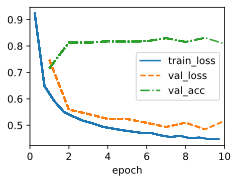

In [22]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [23]:
# Prediction

X, y = next(iter(data.val_dataloader()))
tmp = model(X) #__call__ method will invoke forward function
preds = tmp.argmax(axis=1)
tmp.shape,preds.shape

/workspaces/pytorch-basics/.venv310/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


(torch.Size([256, 10]), torch.Size([256]))

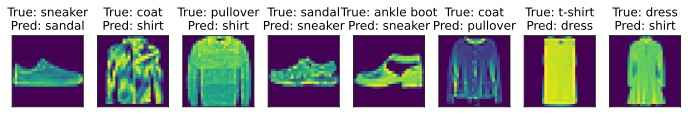

In [27]:
# We are more interested in the images we label incorrectly. We visualize them by comparing their actual labels (first line of text output) 
# with the predictions from the model (second line of text output).
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = ['True: ' + a+'\n' + 'Pred: ' +b for a, b in zip(data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)

======================================Concise Implementation of Softmax Regression========================================

In [28]:
from torch import nn
from torch.nn import functional as F

In [ ]:
class SoftmaxRegression(d2l.Classifier):  #@save
    """The softmax regression model."""
    def __init__(self, num_outputs, lr):
        super().__init__()
        self.save_hyperparameters()
        # nn.Flatten() with default parameter will flattens second dims until last dim into one dim.
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_outputs))

    def forward(self, X):
        return self.net(X) # ← Returns logits (no softmax)

In [ ]:
# F.cross_entropy internally performs:
# 1. Apply softmax to Y_hat (logits → probabilities)
# 2. Compute cross-entropy loss
# 3. Return the loss

# Equivalent to:
# probabilities = F.softmax(Y_hat, dim=1)
# loss = F.nll_loss(torch.log(probabilities), Y)

# And the softmax function is an improved version which will reduce average before applying exponentiation, which avoids both overflow and underflow.
# sth like:
# def softmax(x, dim):
#     # subtract max for numerical stability
#     x_exp = torch.exp(x - x.max(dim=dim, keepdim=True).values)
#     return x_exp / x_exp.sum(dim=dim, keepdim=True)

@d2l.add_to_class(d2l.Classifier)  #@save
def loss(self, Y_hat, Y, averaged=True):
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))  # This reshapes Y_hat to 2D format: (total_samples, num_classes)
    Y = Y.reshape((-1,)) # flattens the tensor to 1D, regardless of its original shape.
    return F.cross_entropy(Y_hat, Y, reduction='mean' if averaged else 'none')

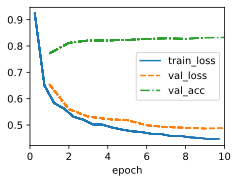

In [31]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegression(num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

=========================================Generalization in Classification================================

Multiple hypothesis testing → testing many classifiers on the same test set increases the chance of false discoveries (misleadingly good results).

Adaptive overfitting → once test set performance influences future model choices, the test set is no longer unbiased.

#### Three-Way Split Solution for Adaptive Overfitting

##### Three-way split is the standard solution to prevent adaptive overfitting

##### **The Problem:**
- **Two-way split**: Train → Validation (used for both model selection AND evaluation)
- **Result**: Model selection process "overfits" to validation set
- **Consequence**: Overly optimistic performance estimates

##### **The Solution: Three-Way Split**

```python
# Traditional (problematic):
Data = Training Set (60%) + Validation Set (40%)
#      ↓                    ↓
#   Train model         Select best model + Evaluate
#                       (Same data used twice! ❌)

# Three-way split (proper):
Data = Training Set (60%) + Validation Set (20%) + Test Set (20%)
#      ↓                    ↓                       ↓
#   Train model         Select best model      Final evaluation
#   (Learn params)      (Tune hyperparams)     (Unbiased estimate)
```

##### **Usage Protocol:**
1. **Training Set**: Train multiple models/configurations
2. **Validation Set**: Compare models, tune hyperparameters, select best
3. **Test Set**: Final evaluation **ONLY ONCE** on the chosen model

##### **Why This Works:**
- **Validation set bias** is contained to model selection phase
- **Test set remains "unseen"** throughout development
- **True generalization** is measured on completely independent data

##### **Alternative Solutions:**
- **Cross-validation**: Reduces validation set overfitting with multiple folds
- **Nested cross-validation**: Even more robust for small datasets
- **Holdout validation**: Strict discipline in test set usage

==========================================Environment and Distribution Shift===============================================


Machine learning models often assume that training data and deployment data come from the same distribution. In practice, this assumption often fails,
causing severe performance degradation. This chapter explains why distribution shift occurs, the main types of shift, and methods for mitigation.

#### 1. Why Distribution Shift Matters

- Real-world data changes over time.
- Models trained on clean datasets may face noisy, shifting environments.
- Deployed models may influence the environment, creating feedback loops
  that further shift the distribution.

#### 2. Distribution Shifts: Label, Covariate, and Concept Shift

##### 2.1 Label Shift (Prior Shift)

-   Class distribution changes: $P\_{train}(Y) \ne P\_{test}(Y)$
-   Conditional features stay the same: $P(X|Y)$ unchanged
-   Example: Train = 50% cats / 50% dogs; Test = 80% cats / 20% dogs
-   Issues:
    -   Model biased toward training frequencies
    -   Miscalibrated confidence
-   Fixes:
    -   Reweighting by class frequency
    -   Importance weighting: $P\_{test}(Y)/P\_{train}(Y)$
    -   Post-hoc calibration

##### 2.2 Covariate Shift

-   Input distribution changes: $P\_{train}(X) \ne P\_{test}(X)$
-   Conditional label distribution stays same: $P(Y|X)$ unchanged
-   Example: Same task, but test images are darker, blurrier, or from new sensors
-   Issues:
    -   Model underperforms on unseen input styles
-   Fixes:
    -   Domain adaptation
    -   Importance weighting over inputs
    -   Data augmentation


##### 2.3 Concept Shift (Concept Drift)

-   Relationship changes: $P\_{train}(Y|X) \ne P\_{test}(Y|X)$
-   Inputs may stay same, The meaning of the labels changes
-   Example: Spam patterns evolve; same features → different meaning
-   Issues:
    -   Requires constant updating
    -   Hardest form of shift
-   Fixes:
    -   Continuous training / online learning
    -   Drift detection
    -   Ensembles with time decay


#### 3. Empirical vs True Risk

- **Empirical risk**: average loss on training data.
- **True risk**: expected loss on true data distribution.
- Distribution shift breaks the assumption that minimizing empirical risk approximates minimizing true risk.

#### 4. Correcting Covariate Shift

If training distribution is $q(x)$ and deployment distribution is $p(x)$, weight samples by: $\beta(x) = \frac{p(x)}{q(x)}$

Practical steps:
1. Train a classifier to discriminate source vs target samples.
2. Use classifier output to estimate importance weights.
3. Train the main model with weighted empirical risk.

Assumption:
- Deployment distribution must have support within the training distribution.

#### 5. Correcting Label Shift

Since $P(x \mid y)$ is stable:
- Use the model’s confusion matrix (from validation).
- Combine with model predictions on deployment data.
- Solve for new label distribution $p(y)$.

Weights: $\beta(y) = \frac{p(y)}{q(y)}$

#### 6. Handling Concept Shift

- Most difficult type.
- Often requires collecting new labeled data and retraining.
- If drift is gradual, online or continual learning can adapt over time.

#### 7. Learning Paradigms and Environments

- **Batch learning**: fixed dataset; no updates after training.
- **Online learning**: model updates continuously with new data.
- **Bandit settings**: partial feedback.
- **Reinforcement learning**: model interacts with environment; actions alter future data.

Each paradigm interacts differently with distribution shift.